In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 16:9 IMSHOW

With Colorbar

#### CREATE EMPTY AXES

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec # GRIDSPEC !
from matplotlib.ticker import FormatStrFormatter
ratio=16/9

plt.style.use('default')
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}' #for \text command
fig=plt.figure(figsize=(ratio*9,9),dpi=120)
plt.rcParams.update({'font.size': 38})
mpl.rc('font', family = 'serif')
plt.axes([0.0,0,1,1])

plt.rcParams.update({"axes.facecolor":    (0.0, 1.0, 0.0, 0.)})

gs = gridspec.GridSpec(1,2, height_ratios=[1], width_ratios=[0.95,0.05],wspace=0.01)
gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)


ax = plt.subplot(gs[0,0]) # place it where it should be.
#ax=plt.gca()


N=42
xmin=0
xmax=40
ymin=0
ymax=20
extent=[xmin,xmax,ymin,ymax]
#im=ax.imshow(np.random.random((N,N)),cmap="afmhot",aspect='auto',origin="lower",extent=extent)
#set_size(16,16/ratio) 

from mpl_toolkits.axes_grid1 import make_axes_locatable
l, b, w, h = ax.get_position().bounds
color_axis  = plt.subplot(gs[0,1]) # place it where it should be.

#the_divider = make_axes_locatable(ax)
#color_axis = the_divider.append_axes("right", size="5%", pad=0.0)

cbar=plt.colorbar(im,cax=color_axis)
cbar.set_label(r"$|E_2|^2 \;[m_e\text{c}\omega_p/e]$")
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
cbar.set_clim(0, 1.0)

ax.set_xlabel(r"$t_{det}~[\omega_p^{-1}]$")
ax.set_ylabel(r"$\phi\;$[mrad]")
xlen=ax.get_xlim()[1]-ax.get_xlim()[0]
ylen=ax.get_ylim()[1]-ax.get_ylim()[0]
ax.set_aspect(xlen/ylen/ratio)
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))



plt.savefig("testtrame.pdf",facecolor=(0.0, 0.0, 0.0, 0.0),bbox_inches="tight")

#### CREATE .pngs

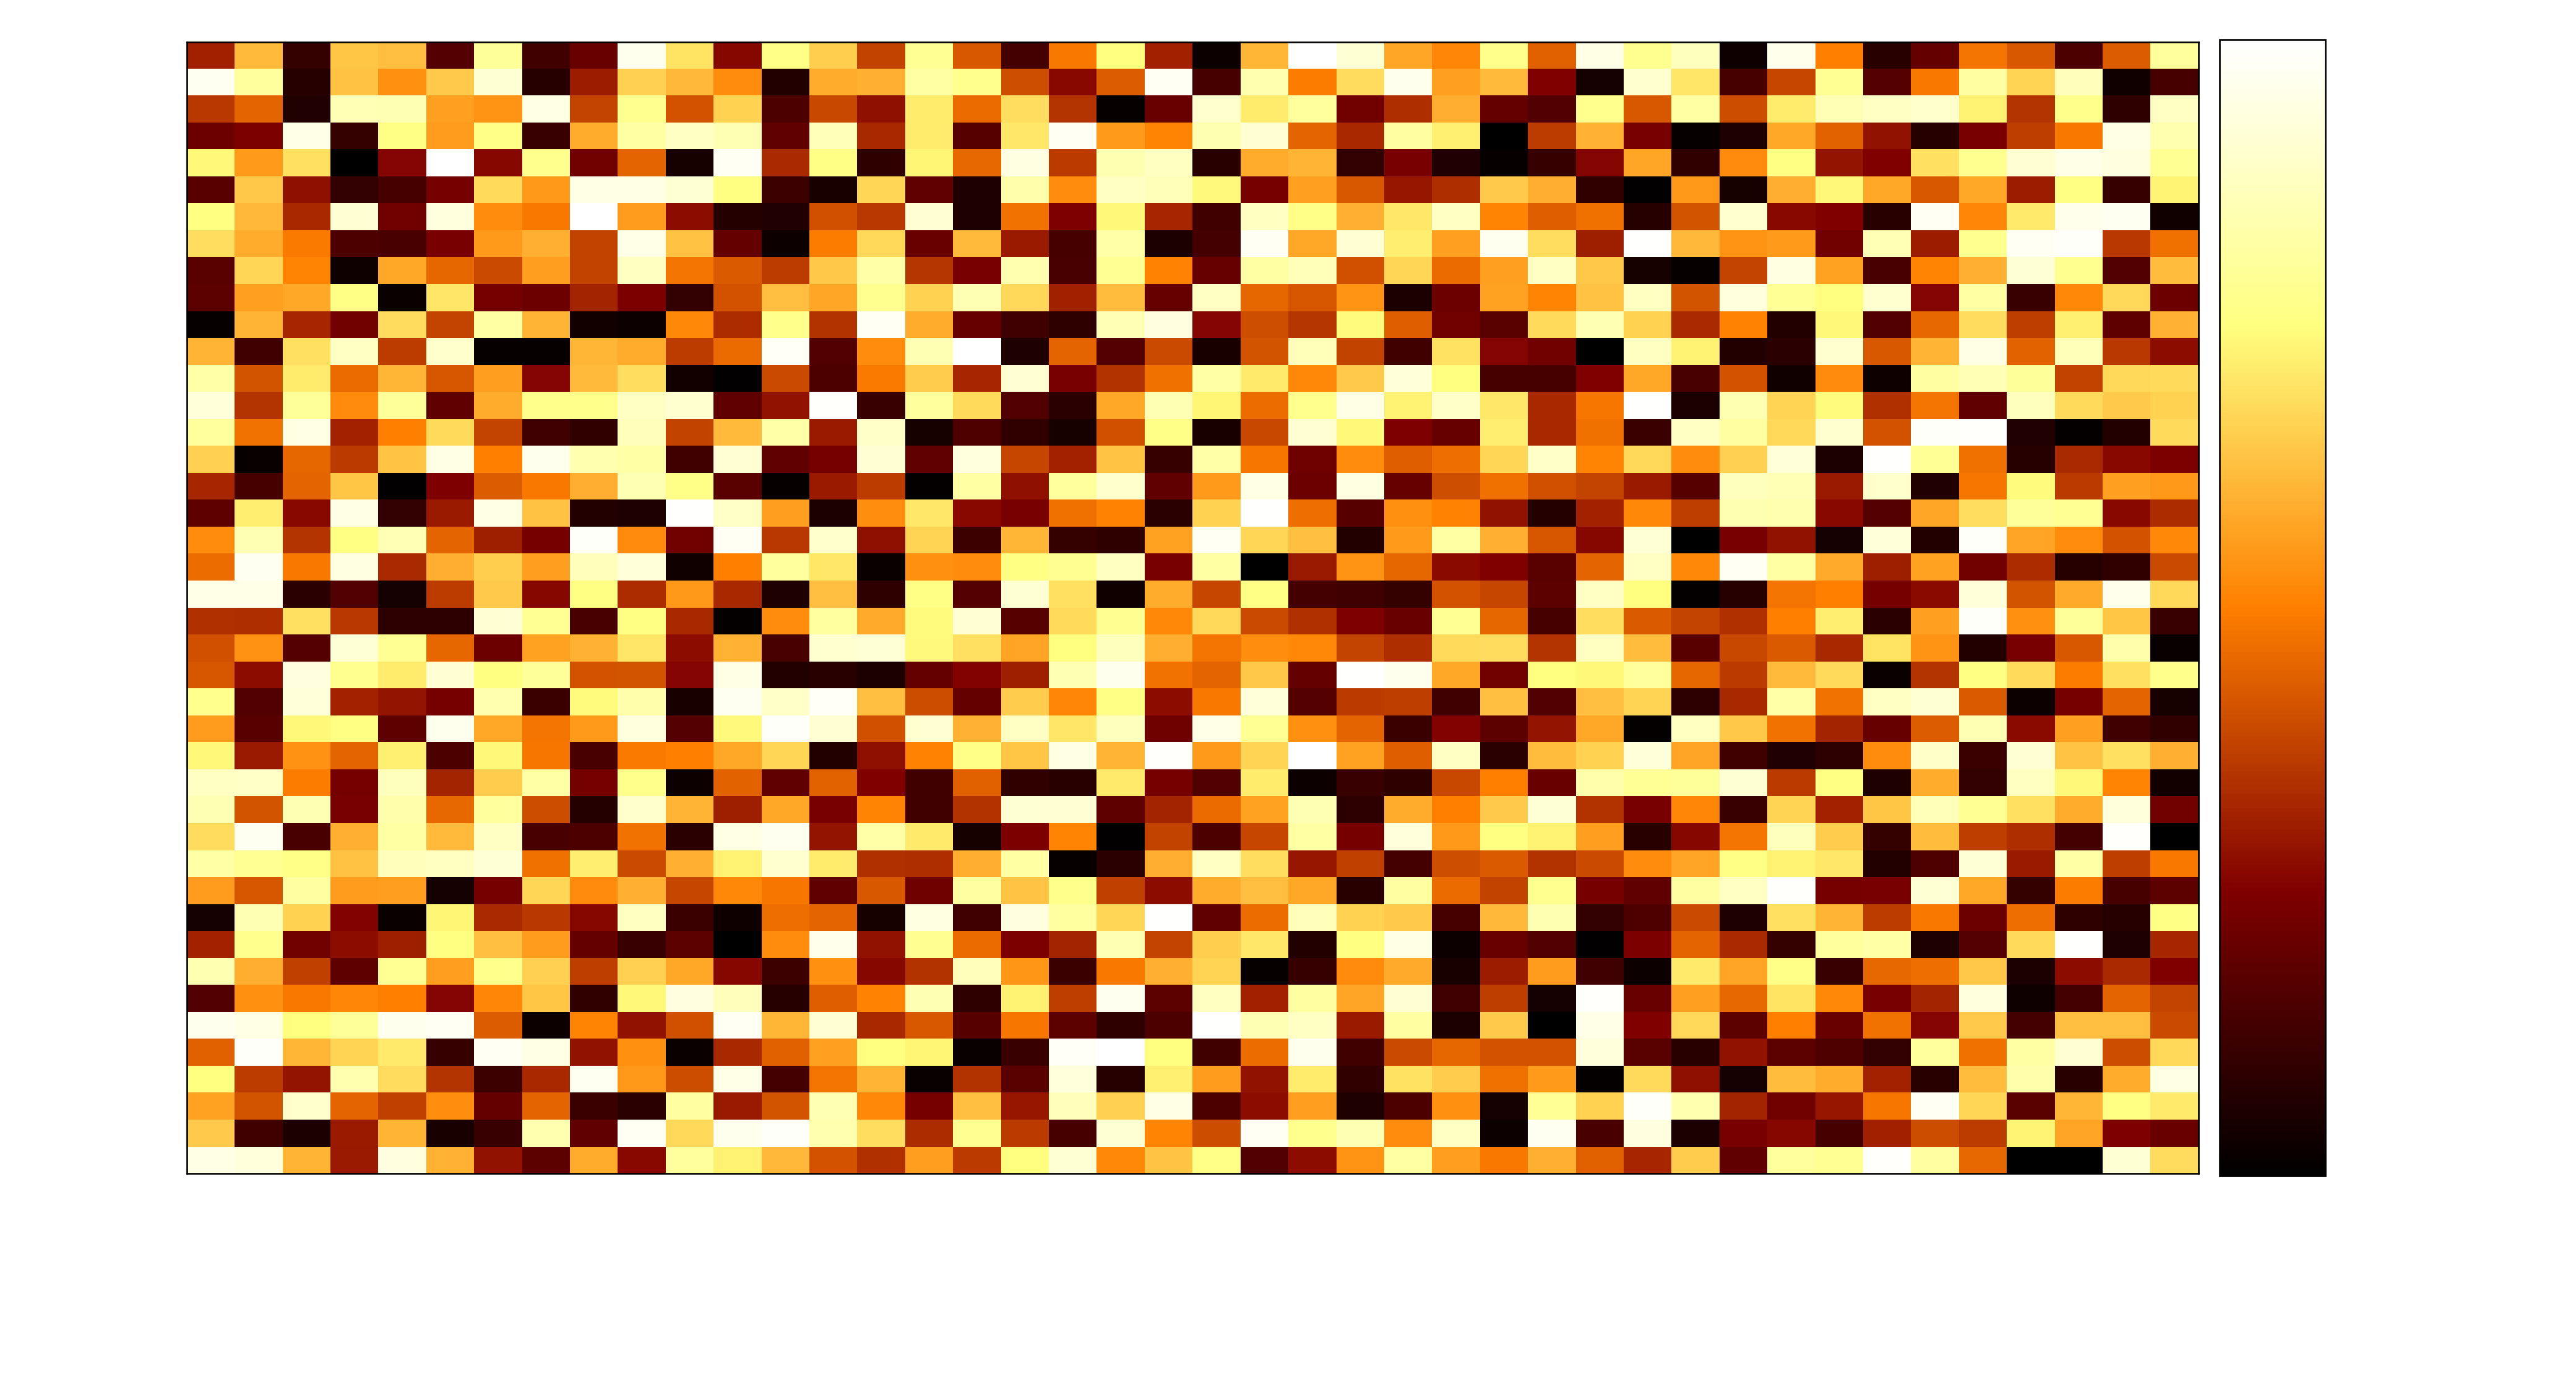

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec # GRIDSPEC !
from matplotlib.ticker import FormatStrFormatter
import matplotlib.animation as animation




ratio=16/9
#plt.rcParams['figure.constrained_layout.use'] = True
plt.style.use('default')
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}' #for \text command
fig=plt.figure(figsize=(ratio*9,9),dpi=240)
plt.rcParams.update({'font.size': 38})
mpl.rc('font', family = 'serif')


COLOR = 'w'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

gs = gridspec.GridSpec(1,2, height_ratios=[1], width_ratios=[0.95,0.05],wspace=0.01)
gs.update(left=0.05, right=0.95, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)


ax = plt.subplot(gs[0,0]) # place it where it should be.
#ax=plt.gca()


N=42
xmin=0
xmax=40
ymin=0
ymax=20
extent=[xmin,xmax,ymin,ymax]
im=ax.imshow(np.random.random((N,N)),cmap="afmhot",aspect='auto',origin="lower",extent=extent)
#set_size(16,16/ratio) 

from mpl_toolkits.axes_grid1 import make_axes_locatable
l, b, w, h = ax.get_position().bounds
color_axis  = plt.subplot(gs[0,1]) # place it where it should be.

#the_divider = make_axes_locatable(ax)
#color_axis = the_divider.append_axes("right", size="5%", pad=0.0)

cbar=plt.colorbar(im,cax=color_axis)
cbar.set_label(r"$|E_2|^2 \;[m_e\text{c}\omega_p/e]$")
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
cbar.set_clim(0, 1.0)
ax.set_xlabel(r"$t_{det}~[\omega_p^{-1}]$")
ax.set_ylabel(r"$\phi\;$[mrad]")
xlen=ax.get_xlim()[1]-ax.get_xlim()[0]
ylen=ax.get_ylim()[1]-ax.get_ylim()[0]
ax.set_aspect(xlen/ylen/ratio)
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
fps=12
def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )
    #i=4*i
    im.set_array(np.random.random((N,N)))
    #ax.set_title("$t=${:.2f}".format(time_s)+" $\omega_p^{-1}$",y=1.05)
    
    return [im]

for i in range(12):
    im.set_array(np.random.random((N,N)))
    plt.savefig("movietest-{:03d}.png".format(i),facecolor=(0.0, 0.0, 0.0, 0.0),bbox_inches="tight")


#### SET RATIO

In [11]:
! mogrify -path ./ -thumbnail 4163x2220 -background white -gravity center -extent 4164x2220 ./*.png

#### CREATE .mp4

In [12]:
! ffmpeg -framerate 30 -pattern_type glob -i '*.png' -c:v libx264 -pix_fmt yuv420p out3.mp4

ffmpeg version 5.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 13.1.6 (clang-1316.0.21.2.5)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/5.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disable-indev=jack --enable-videotoolbox -

zsh:1: command not found: y
